# Submission 3
by Wilsion Lee

 ## Import Libraries

In [1]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn :: utils
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# sklearn :: models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# sklearn :: evaluation metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

sns.set_style('whitegrid')

## Load Data

In [2]:
df_train = pd.read_csv("../../Data/Processed/train_cleaned.csv")
print(df_train.columns)
df_train.head()

Index(['id', 'log_price', 'accommodates', 'bathrooms', 'cancellation_policy',
       'cleaning_fee', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate',
       ...
       'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed', 'Boston', 'Chicago',
       'DC', 'LA', 'NYC', 'SF'],
      dtype='object', length=180)


,id,log_price,accommodates,bathrooms,cancellation_policy,cleaning_fee,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,...,Couch,Futon,Pull-out Sofa,Real Bed,Boston,Chicago,DC,LA,NYC,SF
0,13662370,3.806662,2,1.5,3,1,1368.0,1,1,100,...,0,0,0,1,0,1,0,0,0,0
1,4765892,4.941642,2,2.0,3,1,1200.0,1,1,100,...,0,0,0,1,0,0,0,1,0,0
2,21169968,4.941642,5,1.0,2,1,647.0,1,1,100,...,0,0,0,1,0,0,0,0,1,0
3,7939196,4.867534,6,1.0,3,1,2292.0,1,1,70,...,0,0,0,1,0,0,0,0,1,0
4,18161036,3.663562,2,1.0,1,1,734.0,1,1,100,...,0,0,0,1,0,0,0,1,0,0


In [3]:
df_test = pd.read_csv("../../Data/Processed/test_cleaned.csv")
print(df_test.columns)
df_test.head()

Index(['id', 'accommodates', 'bathrooms', 'cancellation_policy',
       'cleaning_fee', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'host_since',
       ...
       'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed', 'Boston', 'Chicago',
       'DC', 'LA', 'NYC', 'SF'],
      dtype='object', length=181)


c:\users\wilson lee\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,accommodates,bathrooms,cancellation_policy,cleaning_fee,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,...,Couch,Futon,Pull-out Sofa,Real Bed,Boston,Chicago,DC,LA,NYC,SF
0,986942,2,1.0,1,0,1306.0,1,1,0,1345.0,...,0,0,0,1,0,0,0,0,1,0
1,16436737,4,1.5,2,1,1525.0,1,1,100,1615.0,...,0,0,0,1,0,0,1,0,0,0
2,18209634,1,1.0,1,1,1019.0,1,1,100,1608.0,...,0,0,0,1,0,0,0,0,1,0
3,15027024,2,1.0,1,0,0.0,1,1,0,1418.0,...,0,0,0,1,0,0,0,0,1,0
4,18074243,6,1.0,3,1,1034.0,1,1,100,1095.0,...,0,0,0,1,0,0,0,0,1,0


## Model Testing function

In [4]:
def evaluation_chart(test, pred, title):
    plt.scatter(test, pred, alpha=0.3)
    plt.plot(range(0,5000000, 100), range(0,5000000, 100), '--r', alpha=0.3, label='Line1')
    plt.title(title)
    plt.xlabel('True Value')
    plt.ylabel('Predict Value')
    plt.xlim([0, 10])
    plt.ylim([0, 10])
    plt.show()

def model_training(model, X_train, y_train, X_test):
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)
    return(y_pred)

def model_evaluation(title, model, y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(title)
    print('MAE', round(mae, 2))
    print('RMSE', round(rmse, 2))
    evaluation_chart(y_test, y_pred, title)
    importance = []
    if hasattr(model, 'feature_importances_'):
        print('Feature Importance')
        importance = []
        for i in range(len(X_columns)):
            importance.append([X_columns[i], model.feature_importances_[i]])
        print(pd.DataFrame(importance).sort_values(by=1, ascending=False).head(10))
    return(mae, rmse)

def run_experiment(title, model, X_train, y_train, X_test, y_test):
    y_pred = model_training(model, X_train, y_train, X_test)
    mae, rmse = model_evaluation(title, model, y_test, y_pred)
    return(mae, rmse)


## Model Definition

In [5]:
models = [
    ('LinearRegression', LinearRegression()),
    ('RandomForestRegressor10', RandomForestRegressor(n_estimators=10, random_state=5)),
    ('RandomForestRegressor150', RandomForestRegressor(n_estimators=150, random_state=5)),
    ('KNeighborsRegressor', KNeighborsRegressor()),
    ('DecisionTreeRegressor', DecisionTreeRegressor()),
]

## Execution Function

In [6]:
def executetion(df_data, list_X_column, list_y_column):
    threshold = 0.8
    X = df_data[list_X_column]
    y = df_data[list_y_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0-threshold, shuffle=True)

    print('X_train', X_train.shape)
    print('y_train', y_train.shape)
    print('X_test', X_test.shape)
    print('y_test', y_test.shape)

    results = []
    for m in models:
        mae, rmse = run_experiment(m[0], m[1], X_train, y_train, X_test, y_test)
        results.append([m[0], mae, rmse])
    
    return results


## Define Columns to Use

In [7]:
# Exclude all zipcode columns
exclude_columns = ['zipcode']

X_columns = [ x for x in df_train.columns.values if(x != "log_price") & (x != "id") & (x not in exclude_columns)]
y_columns = ["log_price"]

## Run Model

X_train (40800, 177)
y_train (40800, 1)
X_test (10200, 177)
y_test (10200, 1)
LinearRegression
MAE 0.35
RMSE 0.46


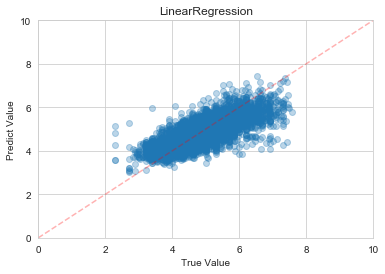

RandomForestRegressor10
MAE 0.3
RMSE 0.41


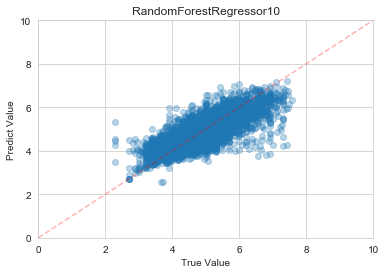

Feature Importance
                    0         1
36    Entire home/apt  0.358811
1           bathrooms  0.120460
12          longitude  0.118437
11           latitude  0.099237
8          host_since  0.047284
10        last_review  0.039162
0        accommodates  0.034212
17           bedrooms  0.025364
4        first_review  0.023856
14  number_of_reviews  0.018276
RandomForestRegressor150
MAE 0.28
RMSE 0.39


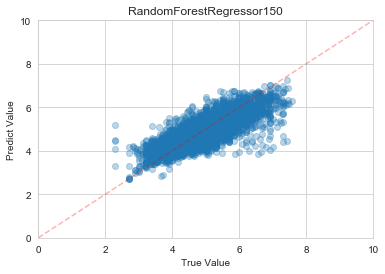

Feature Importance
                    0         1
36    Entire home/apt  0.360230
12          longitude  0.120060
1           bathrooms  0.119865
11           latitude  0.099089
8          host_since  0.047762
10        last_review  0.037377
0        accommodates  0.034182
17           bedrooms  0.025417
4        first_review  0.024707
14  number_of_reviews  0.017574
KNeighborsRegressor
MAE 0.57
RMSE 0.72


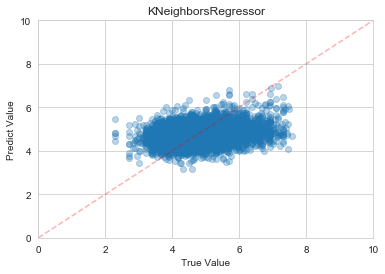

DecisionTreeRegressor
MAE 0.41
RMSE 0.57


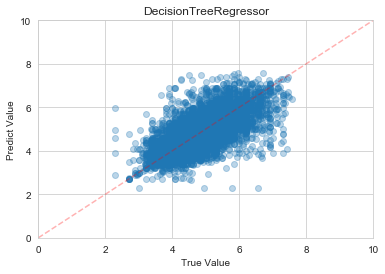

Feature Importance
                    0         1
36    Entire home/apt  0.360064
1           bathrooms  0.120514
12          longitude  0.120254
11           latitude  0.104821
8          host_since  0.048491
10        last_review  0.033665
0        accommodates  0.033498
4        first_review  0.026869
17           bedrooms  0.025068
14  number_of_reviews  0.017474


In [8]:
results = executetion(df_train, X_columns, y_columns)

## Model performance

In [9]:
# sort the results and print as a table
df_results = pd.DataFrame(results)
df_results.columns = ['model', 'mae', 'rmse']
df_results = df_results.sort_values(by='mae')
df_results

,model,mae,rmse
2,RandomForestRegressor150,0.282649,0.391801
1,RandomForestRegressor10,0.299406,0.413210
0,LinearRegression,0.348430,0.459407
4,DecisionTreeRegressor,0.408125,0.567216
3,KNeighborsRegressor,0.567029,0.722198


## Fit Test Data

In [10]:
print("Using Model {0}".format(models[2][0]))
X_test = df_test[X_columns]
y_pred = models[2][1].predict(X_test)

Using Model RandomForestRegressor150


## Prepare Data for Submission

In [11]:
df_test['log_price'] = y_pred
df_save = df_test[['id', 'log_price']]
df_save

,id,log_price
0,986942,4.174545
1,16436737,4.340422
2,18209634,3.896198
3,15027024,4.150460
4,18074243,5.061095
5,8446914,5.342001
6,19362916,4.265565
7,16116059,6.040478
8,20912583,5.119035
9,13573101,4.761809


## Save Data

In [12]:
df_save.to_csv("../../Data/Modeling/submission_03.csv", index=False)